In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
from expcal import cal_snr, cal_snr_nexp, cal_exp

In [3]:
#calcuate final SNR from n exposures
exptimes = np.arange(0, 300, 1) #exptime of single shot
sns0, total_n0 = cal_snr_nexp(exptimes, rate=5, mag=25.5, seeing=1, total_time=3600)
best_exp0 = exptimes[sns0==sns0.max()][0]
best_n0 = total_n0[sns0==sns0.max()][0]
sns1, total_n1 = cal_snr_nexp(exptimes, rate=12.5, mag=25.5, seeing=1, total_time=3600)
best_exp1 = exptimes[sns1==sns1.max()][0]
best_n1 = total_n1[sns1==sns1.max()][0]

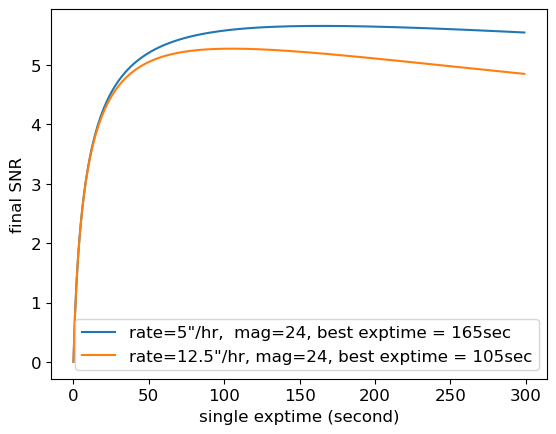

In [4]:
plt.plot(exptimes, sns0, label=f'rate=5"/hr,  mag=24, best exptime = {best_exp0}sec')
plt.plot(exptimes, sns1, label=f'rate=12.5"/hr, mag=24, best exptime = {best_exp1}sec')
#plt.text(150, 3, s=f'best single exptime = {best_exp}sec')
plt.xlabel('single exptime (second)')
plt.ylabel('final SNR')
plt.legend()

Text(0, 0.5, 'SNR')

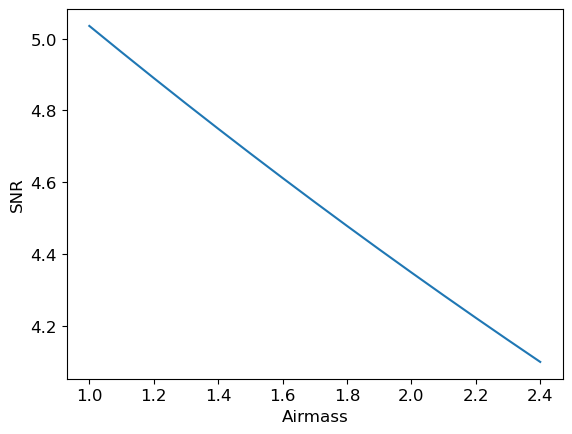

In [5]:
#calcuate SNR for a source as the function of airmass
airmass = np.arange(1, 2.5, 0.1)
snrs = cal_snr(exptime = 120, rate=5, mag=24, airmass=airmass, moon=3, Filter='r')
plt.plot(airmass, snrs)
plt.xlabel('Airmass')
plt.ylabel('SNR')

In [6]:
#calcuate expousre time for given SNR
exptime = cal_exp(snr=5, rate=10, mag=23.5, airmass=1.2, moon=10, Filter='r', niter=10)

In [7]:
exptime

99.01108160160972

In [8]:
#check the SNR for the estimated exptime
cal_snr(exptime, rate=10, mag=23.5, airmass=1.2, moon=10, Filter='r')

4.981763535768855